In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file):
    df = pd.read_csv(file)
    return df

datacrash = load_data('Airplane_Crashes.csv')

datacrash.head(5)


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [2]:
def drop_null(df,percent):
    for column in df:
        result = (df[column].isnull().sum()/len(df))
        if result >= percent:
            del df[column]    
    return df
        
datacrash = drop_null(datacrash,0.75)
datacrash.head(5)

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [3]:
def split_column(df,col):
    df['new_column'] = df[col].str.split(',').str[-1]
    df['new_column2'] = df[col].str.split(',').str[0]
    return df

datacrash = split_column(datacrash,'Location')

datacrash.head(5)


,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,new_column,new_column2
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Virginia,Fort Myer
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,New Jersey,AtlantiCity
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Canada,Victoria
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Over the North Sea,Over the North Sea
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Germany,Near Johannisthal


In [4]:
def rename_col(df,col,new_name):
    df.rename(columns = { col: new_name}, inplace = True)
    return df

datacrash = rename_col(datacrash,'new_column','Country')
datacrash = rename_col(datacrash,'new_column2','Regions')
datacrash.head(5)


,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Country,Regions
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Virginia,Fort Myer
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,New Jersey,AtlantiCity
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Canada,Victoria
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Over the North Sea,Over the North Sea
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Germany,Near Johannisthal


In [5]:
def percent(df,col,column):
    df['percent'] = ((df[col]/df[column])*100)
    return df

datacrash = percent(datacrash,'Fatalities','Aboard')
datacrash.head(5)

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Country,Regions,percent
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Virginia,Fort Myer,50.0
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,New Jersey,AtlantiCity,100.0
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Canada,Victoria,100.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Over the North Sea,Over the North Sea,70.0
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Germany,Near Johannisthal,100.0


In [6]:
def change_null(df):
    return df.fillna('-')

datacrash = change_null(datacrash)
datacrash.head(5)

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Country,Regions,percent
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,-,1,2,1,0,"During a demonstration flight, a U.S. Army fly...",Virginia,Fort Myer,50
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,-,-,5,5,0,First U.S. dirigible Akron exploded just offsh...,New Jersey,AtlantiCity,100
2,08/06/1913,-,"Victoria, British Columbia, Canada",Private,-,Curtiss seaplane,-,-,1,1,0,The first fatal airplane accident in Canada oc...,Canada,Victoria,100
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,-,Zeppelin L-1 (airship),-,-,20,14,0,The airship flew into a thunderstorm and encou...,Over the North Sea,Over the North Sea,70
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,-,Zeppelin L-2 (airship),-,-,30,30,0,Hydrogen gas which was being vented was sucked...,Germany,Near Johannisthal,100


In [7]:
def filter_col(df,col):
    crashes = df[col].value_counts()
    return (crashes.index[:10])

def filter_data(df,col):
    col_filtered = filter_col(df,col)
    data_filtered = df[df[col].isin(col_filtered)]
    return data_filtered

datacrash= filter_data(datacrash,'Country')

datacrash.head(5)

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Country,Regions,percent
2,08/06/1913,-,"Victoria, British Columbia, Canada",Private,-,Curtiss seaplane,-,-,1,1,0,The first fatal airplane accident in Canada oc...,Canada,Victoria,100
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,-,Zeppelin L-32 (airship),-,-,22,22,0,Shot down by British aircraft crashing in flames.,England,Billericay,100
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,-,Zeppelin L-31 (airship),-,-,19,19,0,Shot down in flames by the British 39th Home D...,England,Potters Bar,100
11,11/28/1916,23:45,"Off West Hartlepool, England",Military - German Navy,-,Zeppelin L-34 (airship),-,-,20,20,0,Shot down by British anti-aircraft fire and ai...,England,Off West Hartlepool,100
17,10/20/1917,07:45,"Near Luneville, France",Military - German Navy,-,Zeppelin L-44 (airship),-,-,18,18,0,Shot down by French anti-aircraft fire.,France,Near Luneville,100


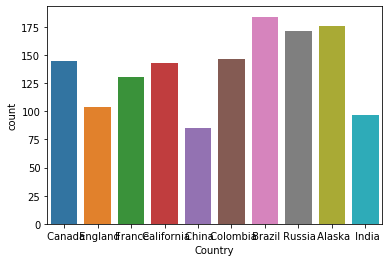

In [9]:
def draw_plot(col,df):
    plot = sns.countplot(x=col, data=df)
    return plot

draw_plot('Country',datacrash)